<a href="https://colab.research.google.com/github/HiroakiMikami/deep-coder/blob/feature%2F27-colab/examples/small/integer_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Initialization
* Check whether the runtime is host or local.
* Mount Google Drive when using the host runtime.

In [8]:
try:
  from google.colab import drive
  drive.mount('/gdrive')
  runtime = "host"
except:
  runtime = "local"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### Parameters

In [0]:
#@title Parameters
#@markdown |Name            |Description|
#@markdown |:---            |:---|
#@markdown |`seed`|The random seed|
seed = 3984 #@param {type: "number"}

#@markdown ### `deep-coder` Repositories
#@markdown |Name            |Description|
#@markdown |:---            |:---|
#@markdown |`repository_url`|The URL of `deep-coder` git repository (enabled only in the host runtime)|
#@markdown |`branch_name`   |The branch name (enabled only in the host runtime)|
repository_url = "https://github.com/HiroakiMikami/deep-coder" #@param {type: "string"}
branch_name = "master" #@param {type: "string"}

#@markdown ### Filepathes
#@markdown |Name              |Description|
#@markdown |:---              |:---|
#@markdown |`model_shape_path`|The file path of the model shape.|
#@markdown |`model_path`      |The file path of the model parameters.|
model_shape_path = "/gdrive/My Drive/DeepCoder/out/length_1/model-shape.pickle" #@param {type: "string"}
model_path = "/gdrive/My Drive/DeepCoder/out/length_1/model.npz" #@param {type: "string"}



### Setup
* Fix the random seed
* Download the codebase (when using the host runtime)
  1. Clone git repository and move to the specified branch
  2. Initialize submodule
  3. Build the `search` tool
  4. Install chainer and cupy

In [0]:
import numpy as np
import random

SEED_MAX = 2**32 - 1

root_rng = np.random.RandomState(seed)
random.seed(root_rng.randint(SEED_MAX))
np.random.seed(root_rng.randint(SEED_MAX))

In [4]:
if runtime == "host":
  %cd /content
  !rm -rf deep-coder
  ![ ! -e deep-coder ] && git clone $repository_url deep-coder
  %cd deep-coder
  !git checkout origin/$branch_name
  !git submodule init
  !git submodule update
  !make -C DeepCoder_Utils/enumerative-search -j `nproc`
  !curl https://colab.chainer.org/install | sh -

/content
Cloning into 'deep-coder'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 1243 (delta 71), reused 64 (delta 34), pack-reused 1124
Receiving objects: 100% (1243/1243), 17.81 MiB | 15.02 MiB/s, done.
Resolving deltas: 100% (749/749), done.
/content/deep-coder
Note: checking out 'origin/master'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at cbf6f06 Add example script to generate the dataset
Submodule 'DeepCoder_Utils' (https://github.com/HiroakiMikami/DeepCoder-Utils.git) registered for path 'DeepCoder_Utils'


### Load Model
* Load model

In [0]:
import pickle
import chainer as ch
from src.model import ModelShapeParameters, Predictor

# Load model
with open(model_shape_path, "rb") as f:
    model_shape: ModelShapeParameters = pickle.load(f)
predictor = Predictor(model_shape)
ch.serializers.load_npz(model_path, predictor)

### Visualize Model
* Show integer embeddings

In [0]:
#@markdown ### Visualization Parameters
#@markdown |Name    |Description|
#@markdown |:---    |:---|
#@markdown |`width` |The width of the matplotlib plot|
#@markdown |`height`|The height of the matplotlib plot|
#@markdown ---
width = 12 #@param {type: "slider", min: 1, max: 48, step: 1}
height = 12 #@param {type: "slider", min: 1, max: 48, step: 1}


Text(0.0042851665, -1.9128416, 'Null')

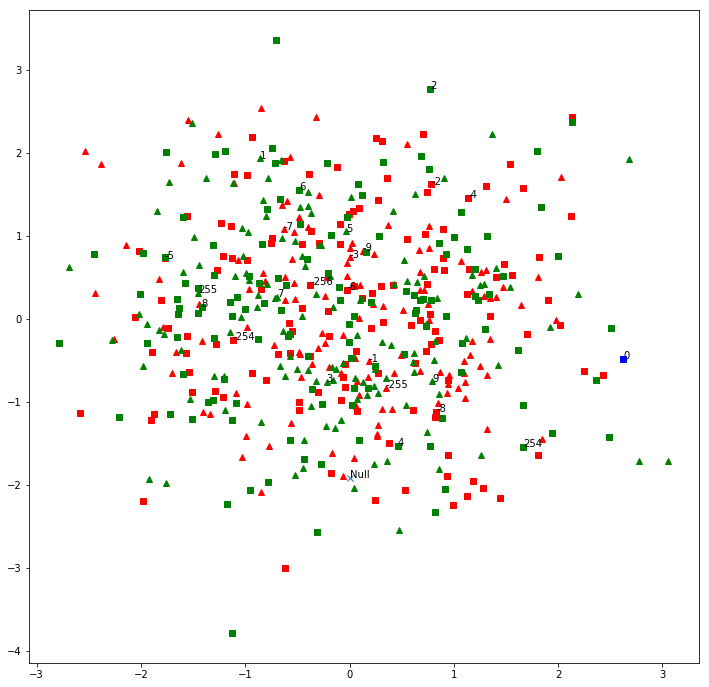

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(width, height))

embed = list(predictor.children())[0]._embed_integer
axis_0, axis_1 = np.random.choice(model_shape.n_embed, 2, replace=False)
for i in range(-model_shape.dataset_metadata.value_range, model_shape.dataset_metadata.value_range):
    e = embed(np.array([i + model_shape.dataset_metadata.value_range]))
    x = e.array[0, axis_0]
    y = e.array[0, axis_1]

    if i == 0:
        color = "b"
    elif i > 0:
        color = "g"
    else:
        color = "r"

    if i % 2 == 0:
        shape = "s"
    else:
        shape = "^"

    plt.plot(x, y, "{}{}".format(color, shape))
    if abs(i) < 10 or abs(i) > 253:
        plt.annotate("{}".format(i), xy=(x, y))

e = embed(np.array([2 * model_shape.dataset_metadata.value_range]))
x = e.array[0, axis_0]
y = e.array[0, axis_1]
plt.plot(x, y, "x")
plt.annotate("Null", xy=(x, y))
